# **Predict Career Longevity for NBA Rookies using XGBClassifier.** 

This AI Challenge is a part of the Python for Machine Learning International Bootcamp by Global AI Hub



**About the data**

The dataset contains player statistics for NRB Rookies. There are 1100+ observations in the train dataset with 19 variables excluding the target variable (i.e. Target).

**Data Description**

GP: Games Played (here you might find some values in decimal, consider them to be the floor integer, for example, if the value is 12.789, the number of games played by the player is 12)


The values for given attributes are averaged over all the games played by players

* MIN:  Minutes Played

* PTS: Number of points per game

* FGM: Field goals made

* FGA: Field goals attempt

* FG%: field goals percent

* 3P Made: 3 point made

* 3PA: 3 points attempt

* 3P%: 3 point percent

* FTM: Free throw made

* FTA: Free throw attempts

* FT%: Free throw percent

* OREB: Offensive rebounds

* DREB: Defensive rebounds

* REB: Rebounds

* AST: Assists

* STL: Steals

* BLK: Blocks

* TOV: Turnovers

**What we are predicting.**

* Target: 0 if career years played < 5, 1 if career years played >= 5

In [251]:
!pip install -q imbalanced-learn

In [252]:
#Data analysis.
import pandas as pd
import numpy as np

#Visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Classification models.
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#Data Preprossessing.
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

#Model Evaluation.
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


## **Prepare Data.**

#Import

In [253]:
#wrangling function
def wrangle(csv_file_location):
  df = pd.read_csv(csv_file_location)
  # return data frame
  return df

In [254]:
df = wrangle("/content/drive/MyDrive/globalAiproject/longevity_train.csv")
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [255]:
df.shape

(1101, 20)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


In [257]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1101.0,59.008156,17.236886,11.0,46.223257,59.387147,76.000000,82.0
MIN,1101.0,16.928284,8.034209,3.1,10.492268,15.386486,21.830403,40.9
PTS,1101.0,6.502344,4.163856,1.1,3.587756,5.200000,8.300000,24.3
FGM,1101.0,2.511125,1.611502,0.4,1.400000,2.000000,3.200000,9.0
FGA,1101.0,5.645747,3.422292,1.0,3.200000,4.600000,6.900000,18.9
FG%,1101.0,43.912555,6.106910,25.0,40.000000,43.652785,47.700000,73.7
3P Made,1101.0,0.241959,0.363008,0.0,0.000000,0.100000,0.400000,2.3
3PA,1101.0,0.767455,1.017214,0.0,0.000000,0.300000,1.195634,6.5
3P%,1101.0,19.050425,15.513640,0.0,0.000000,22.600000,32.300000,100.0
FTM,1101.0,1.241914,0.937585,0.0,0.600000,1.000000,1.600000,7.5


#Explore

##Check for class balance

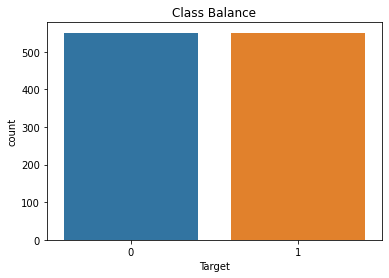

In [258]:
sns.countplot(x=df["Target"])
plt.title('Class Balance');

The classes are balanced.

## Multicollinearity

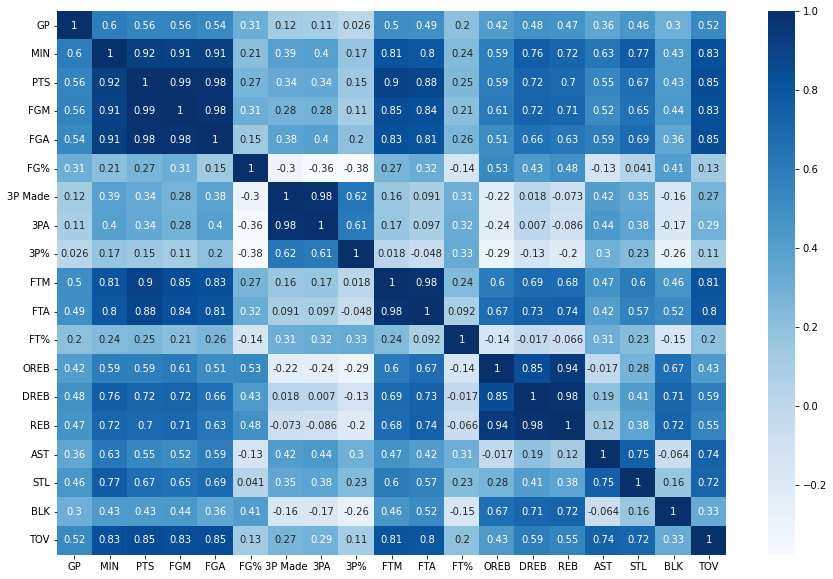

In [259]:
correlation = df.drop(columns="Target").corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation,cmap='Blues', annot=True);

We see that our has alot of correlation. Using Tree based classiffiers would be better as correalation does not affect them like a linear based model.

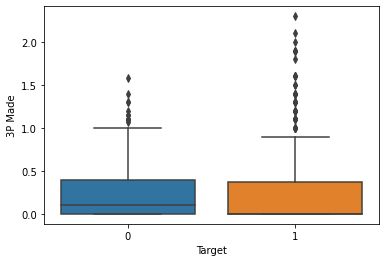

In [260]:
sns.boxplot(x="Target",y="3P Made",data=df);

In [261]:
df[["3P Made","3P%","3PA"]].describe()

,3P Made,3P%,3PA
count,1101.000000,1101.000000,1101.000000
mean,0.241959,19.050425,0.767455
std,0.363008,15.513640,1.017214
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.100000,22.600000,0.300000
75%,0.400000,32.300000,1.195634
max,2.300000,100.000000,6.500000


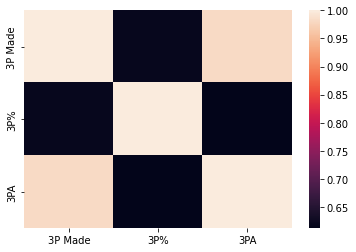

In [262]:
corr = df[["3P Made","3P%","3PA"]].corr()
sns.heatmap(corr);

# **Split**

### Preprocessing

In [263]:
X = df.drop("Target",axis=1)
y = df["Target"]

In [264]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X,y)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (1102, 19)


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X_train_over,y_train_over,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (881, 19)
y_train shape: (881,)
X_test shape: (221, 19)
y_test shape: (221,)


# **Build Model**

## Baseline.

In [266]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5085


# **Iterate**

In [267]:
dd = RandomForestClassifier(random_state=42)

In [268]:
dd.fit(X_train,y_train)
predictions = dd.predict(X_test)
train_predictions = dd.predict(X_train)
print("Baseline Accuracy :", acc_baseline)
print("Train Accuracy :", accuracy_score(y_train,train_predictions))
print("Test Accuracy :", accuracy_score(y_test,predictions))

Baseline Accuracy : 0.5085130533484676
Train Accuracy : 0.9954597048808173
Test Accuracy : 0.7285067873303167


In [269]:
clf = XGBClassifier(random_state=42)

In [270]:
clf.fit(X_train_over,y_train_over)

XGBClassifier(random_state=42)

In [271]:
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.8461538461538461

In [272]:
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
train_predictions = clf.predict(X_train)
print("Baseline Accuracy :", acc_baseline)
print("Train Accuracy :", accuracy_score(y_train,train_predictions))
print("Test Accuracy :", accuracy_score(y_test,predictions))

Baseline Accuracy : 0.5085130533484676
Train Accuracy : 0.8808172531214529
Test Accuracy : 0.7285067873303167


### Grid Search

In [273]:
#Setting up parameters for the model.
params_xgb = {
              'objective':['binary:logistic'],
              'learning_rate': [0.1,0.2],
              "max_depth":range(10,50,10),
              'min_child_weight': range(5,10,5),
              'subsample': [0.6,0.8],
              'colsample_bytree': [0.7],
              'n_estimators':range(25,100,25),
              'seed': [1337]
              }

In [274]:
model = GridSearchCV(
    clf,
    param_grid=params_xgb,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.1, 0.2],
                         'max_depth': range(10, 50, 10),
                         'min_child_weight': range(5, 10, 5),
                         'n_estimators': range(25, 100, 25),
                         'objective': ['binary:logistic'], 'seed': [1337],
                         'subsample': [0.6, 0.8]},
             verbose=1)

In [275]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.1, 0.2],
                         'max_depth': range(10, 50, 10),
                         'min_child_weight': range(5, 10, 5),
                         'n_estimators': range(25, 100, 25),
                         'objective': ['binary:logistic'], 'seed': [1337],
                         'subsample': [0.6, 0.8]},
             verbose=1)

## **Grid Search Cross validation Results.**

In [276]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_objective,...,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119231,0.046097,0.002758,0.000144,0.7,0.1,10,5,25,binary:logistic,...,0.6,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.751412,0.727273,0.693182,0.715909,0.681818,0.713919,0.024692,21
1,0.103672,0.016207,0.005424,0.003213,0.7,0.1,10,5,25,binary:logistic,...,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.740113,0.710227,0.727273,0.710227,0.687500,0.715068,0.017794,13
2,0.185461,0.024519,0.005063,0.004139,0.7,0.1,10,5,50,binary:logistic,...,0.6,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.768362,0.715909,0.704545,0.715909,0.681818,0.717309,0.028400,9
3,0.155665,0.051034,0.008351,0.007746,0.7,0.1,10,5,50,binary:logistic,...,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.779661,0.721591,0.727273,0.721591,0.676136,0.725250,0.032874,4
4,0.207814,0.055855,0.004995,0.003308,0.7,0.1,10,5,75,binary:logistic,...,0.6,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.740113,0.687500,0.710227,0.715909,0.710227,0.712795,0.016787,25
5,0.202888,0.041233,0.003428,0.000152,0.7,0.1,10,5,75,binary:logistic,...,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.779661,0.704545,0.710227,0.715909,0.693182,0.720705,0.030421,5
6,0.059607,0.003865,0.003114,0.000067,0.7,0.1,20,5,25,binary:logistic,...,0.6,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.751412,0.727273,0.693182,0.715909,0.681818,0.713919,0.024692,21
7,0.070365,0.004367,0.003333,0.000353,0.7,0.1,20,5,25,binary:logistic,...,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.740113,0.710227,0.727273,0.710227,0.687500,0.715068,0.017794,13
8,0.111557,0.015808,0.003523,0.000216,0.7,0.1,20,5,50,binary:logistic,...,0.6,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.768362,0.715909,0.704545,0.715909,0.681818,0.717309,0.028400,9
9,0.119463,0.003585,0.003439,0.000265,0.7,0.1,20,5,50,binary:logistic,...,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",0.779661,0.721591,0.732955,0.721591,0.676136,0.726387,0.033022,1


# **Evaluate**

In [277]:
#get the params of the best model
model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_weight': 5,
 'n_estimators': 50,
 'objective': 'binary:logistic',
 'seed': 1337,
 'subsample': 0.8}

Using the best model to predict.

In [278]:
predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
print("Baseline Accuracy :", acc_baseline)
print("Train Accuracy :", accuracy_score(y_train,train_predictions))
print("Test Accuracy :", accuracy_score(y_test,predictions))

Baseline Accuracy : 0.5085130533484676
Train Accuracy : 0.9353007945516458
Test Accuracy : 0.7104072398190046


### **Confusion matrix**

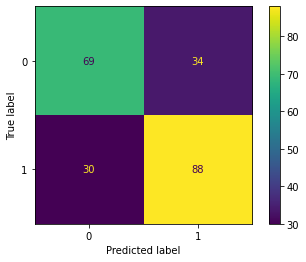

In [279]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

## **Classification Report.**

In [280]:
# Print classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       103
           1       0.72      0.75      0.73       118

    accuracy                           0.71       221
   macro avg       0.71      0.71      0.71       221
weighted avg       0.71      0.71      0.71       221



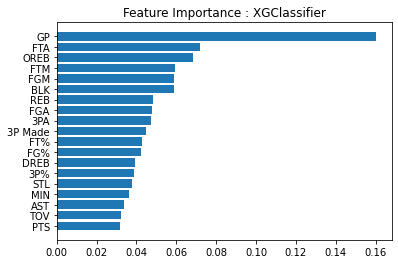

In [281]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.title('Feature Importance : XGClassifier');

# **Predictions on test data.**

In [282]:
df_test = wrangle("/content/drive/MyDrive/globalAiproject/longevity_test.csv")

In [283]:
df_test.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [284]:
df_test_ = wrangle("/content/drive/MyDrive/globalAiproject/longevity_test.csv")
df_test_

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,39.0,22.2,8.9,3.2,7.1,44.6,0.0,0.1,0.0,2.5,3.1,83.2,1.0,2.2,3.2,1.3,0.6,0.1,1.1
551,62.0,13.0,3.5,1.4,3.2,42.9,0.0,0.1,33.3,0.8,1.1,70.1,0.3,1.0,1.4,1.7,0.6,0.1,0.9
552,46.0,22.5,10.2,3.9,6.7,58.6,0.0,0.0,0.0,2.4,3.6,66.5,3.1,4.6,7.7,0.8,0.7,1.0,1.2
553,53.0,6.3,2.4,1.1,2.2,50.0,0.1,0.2,33.3,0.1,0.4,35.0,0.3,0.7,1.0,0.2,0.3,0.0,0.4


In [285]:
test = wrangle("/content/drive/MyDrive/globalAiproject/longevity_test.csv")

In [286]:
pred = model.predict(test)

In [287]:
pd.DataFrame(pred, columns=['prediction'])

,prediction
0,0
1,0
2,0
3,0
4,1
...,...
550,1
551,1
552,1
553,0


In [288]:
pd.DataFrame(pred, columns=['prediction']).to_csv('/content/drive/MyDrive/globalAiproject/prediction.csv',index=False)